In [1]:
# Importando os dados do arquivo csv

import pandas as pd

df_tweet = pd.read_csv('Dados/train/Train3classes.csv')

print(df_tweet.shape)

df_tweet.sample(10).head()

(95000, 5)


,id,tweet_text,tweet_date,sentiment,query_used
75912,1039869678632484864,Capitão da França admite embriaguez e tem cart...,Wed Sep 12 13:33:45 +0000 2018,2,veja
90438,1046789363340890112,n tenho ideia do q fzr no reveillon :( q merda,Mon Oct 01 15:50:07 +0000 2018,0,:(
4282,1049266006026276865,Mano era pra eu tá fazendo campanha agora pro ...,Mon Oct 08 11:51:24 +0000 2018,0,:(
72621,1038145440150118403,Trump pede investigação do 'New York Times' ap...,Fri Sep 07 19:22:15 +0000 2018,2,g1
52006,1046265800561250304,O mais engraçado é que isso não mudou :( https...,Sun Sep 30 05:09:40 +0000 2018,0,:(


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# Separando o Dataframe em Dataframe de Treino e de Teste

df_experiment, df_test = train_test_split(df_tweet, test_size=.3)

In [4]:
SUBSET_DUPLICADOS = df_experiment.drop(['tweet_date', 'id'], axis=1).columns.to_list()

num_duplicados = df_experiment.duplicated(subset=SUBSET_DUPLICADOS).sum()

print(f'{num_duplicados} linhas duplicadas em {len(df_experiment)} registros')

469 linhas duplicadas em 66500 registros


In [5]:
df_experiment = df_experiment.drop_duplicates(subset=SUBSET_DUPLICADOS)

print(df_experiment.shape, f'{df_experiment.duplicated(subset=SUBSET_DUPLICADOS).sum()}')

(66031, 5) 0


<AxesSubplot:>

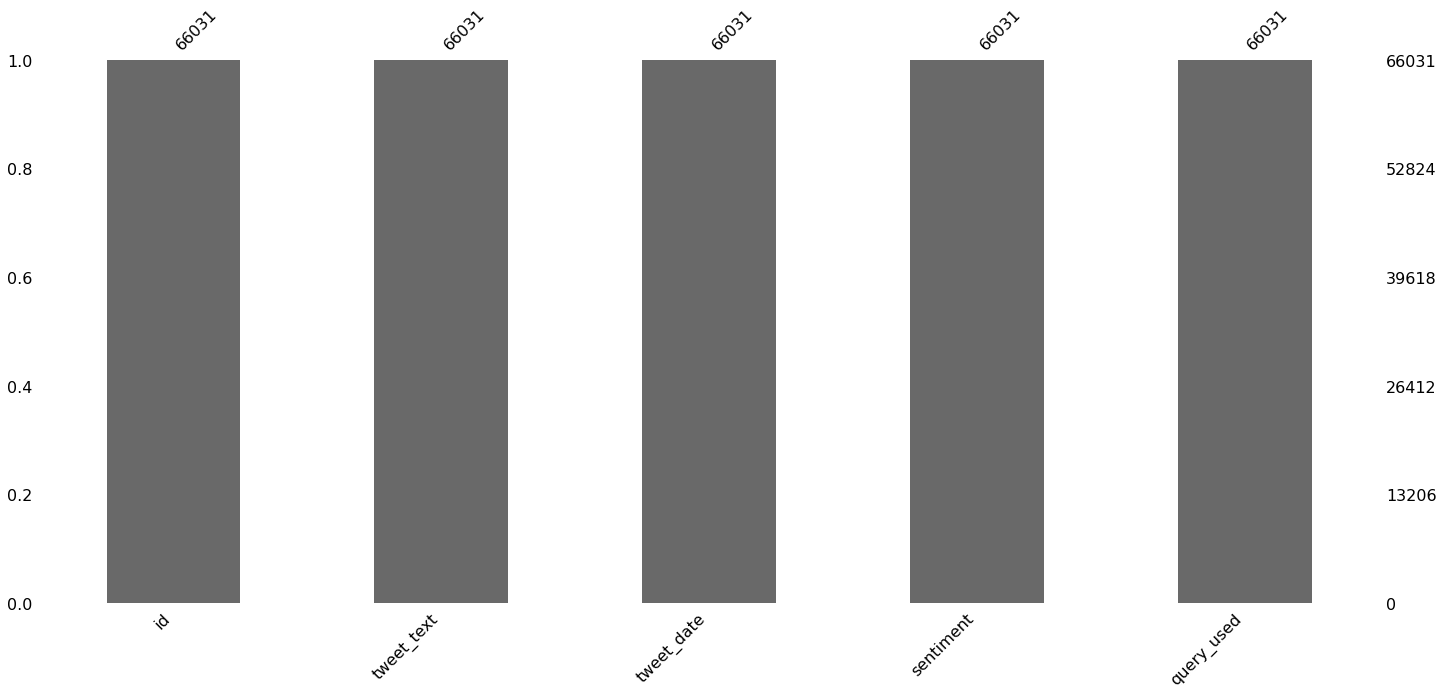

In [6]:
import missingno as msno
msno.bar(df_experiment)

In [7]:
#df_experiment[['tweet_text', 'sentiment']].drop_duplicates()

In [8]:
import re

def clean_https(df):
    text = df['tweet_text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]);
    
    return text

In [9]:
clean_https(df_experiment)

733      Menor suspeito de dirigir bêbado e matar mulhe...
20996    Só quero ser o melhor amigo que você merece :)...
8043     Jovem é agredida e marcada com canivete por ve...
74118    @OtinhaXoXo tambem :(( ela tá passando uns dia...
60530                  @leocarvalhu Poxa amigo que pena :(
                               ...                        
78656    @thisishowKIMdo eu tentei né fada :( que trist...
68983    &gt;@EstadaoCultura Paul McCartney diz que Joh...
58578    20 minutos para apanhar o autocarro e não sei ...
75261               cheguei aos 100 🔥 com a margarida :)))
41113    @LucaMoreira00 @Sikorskinha bom, não existe de...
Name: tweet_text, Length: 66031, dtype: object

In [10]:
df_experiment.sample(10).head()

,id,tweet_text,tweet_date,sentiment,query_used
84841,1049239375547174912,@ddrielo @MakeForgotte @Cinderelaalone @victor...,Mon Oct 08 10:05:35 +0000 2018,1,:)
88912,1046963657022853120,@ecilaxz Oh meu anjinho :(,Tue Oct 02 03:22:42 +0000 2018,0,:(
33789,1047503427666939904,@LucasPCBranco Valeu :p,Wed Oct 03 15:07:33 +0000 2018,1,:)
62365,1046940017040470018,eu abri o app de contagem regressiva pq fui ve...,Tue Oct 02 01:48:45 +0000 2018,0,:(
87562,1047061119716798464,fui passar óleo no cabelo aí esqueci que era ó...,Tue Oct 02 09:49:59 +0000 2018,0,:(


In [11]:
df_train, df_valid = train_test_split(df_experiment, test_size=.2)

In [12]:
x_train, y_train = df_train['tweet_text'], df_train['sentiment']
x_valid, y_valid = df_valid['tweet_text'], df_valid['sentiment']

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(52824,) (52824,)
(13207,) (13207,)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)

vectorizer.fit(x_train)

TfidfVectorizer(max_features=10000)

In [14]:
x_train_transformed = vectorizer.transform(x_train).toarray()

print(x_train_transformed.shape)

x_valid_transformed = vectorizer.transform(x_valid).toarray()

print(x_valid_transformed.shape)

(52824, 10000)
(13207, 10000)


In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
modelo = MultinomialNB()

modelo

MultinomialNB()

In [18]:
modelo.fit(x_train_transformed, y_train)

MultinomialNB()

In [19]:
y_train_pred = modelo.predict(x_train_transformed)

y_valid_pred = modelo.predict(x_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(52824,) (13207,)


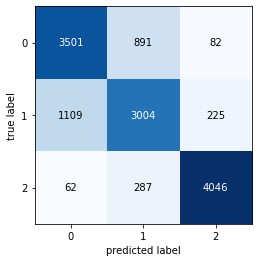

In [20]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred,average='micro')
rec_train = recall_score(y_train, y_train_pred, average='micro')

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred, average='micro')
rec_valid = recall_score(y_valid, y_valid_pred, average='micro')

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.83, Precision: 0.83, Recall: 0.83
Validação:
Acc: 0.80, Precision: 0.80, Recall: 0.80


## Teste

In [22]:
x_test = df_test['tweet_text']
y_test = df_test['sentiment']

print(x_test.shape, y_test.shape)

(28500,) (28500,)


In [23]:
x_test_transformed = embeddings(x_test, model_w2v)

print(x_test_transformed.shape)

NameError: name 'embeddings' is not defined

In [ ]:
y_test_pred = modelo.predict(x_test_transformed)

print(y_test_pred.shape)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred,average='micro')
rec_test = recall_score(y_test, y_test_pred, average='micro')


print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

## Subm

In [ ]:
df_subm = pd.read_csv('Dados/subm/Subm3classes.csv')

print(df_subm.shape)

df_subm.sample(10).head()

In [ ]:
def sentimento(query):
    if query == ':)':
        return 1
    elif query == ':(':
        return 0
    else:
        return 2

In [ ]:
df_subm['sentiment'] = df_subm['query_used'].apply(sentimento)

In [ ]:
df_subm.sample(10).head()

In [ ]:
x_subm = df_subm['tweet_text']
y_subm = df_subm['sentiment']

print(x_subm.shape, y_subm.shape)

In [ ]:
x_subm_transformed = embeddings(x_subm, model_w2v)

print(x_subm_transformed.shape)

In [ ]:
y_subm_pred = modelo.predict(x_subm_transformed)

print(y_subm_pred.shape)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_subm = accuracy_score(y_subm, y_subm_pred)
prec_subm = precision_score(y_subm, y_subm_pred,average='micro')
rec_subm = recall_score(y_subm, y_subm_pred, average='micro')


print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

In [ ]:
#from bs4 import BeautifulSoup
#import lxml.html

#def clean_tweet(text):
#    clean_text = BeautifulSoup(text, "lxml").text
    
#    return clean_text

In [ ]:
#df_experiment['tweet_text'] = df_experiment['tweet_text'].apply(clean_lxml);

In [ ]:
#import numpy as np
#import re

#def remove_pattern(text, pattern_regex):
#    r = re.findall(pattern_regex, text)
#    for i in r:
#        text = re.sub(i, '', text)
    
#    return text

In [ ]:
#df_experiment['tweet_text'] = np.vectorize(remove_pattern)(df_experiment['tweet_text'], "@[\w]*: | *RT*");